In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import professor2 as prof

In [3]:
from ipywidgets import *

In [4]:
IFILE='/home/hschulz/DarkMatter/Aeterna/BreakProfessor/ipol.dat'

In [5]:
METADATA, IHISTOS = prof.read_ipolhistos(IFILE)


In [6]:
PNAMES=METADATA['ParamNames'].split()

In [7]:
VMIN = map(float, METADATA['MinParamVals'].split())

In [8]:
VMAX = map(float, METADATA['MaxParamVals'].split())

In [9]:
STEPS=20.

In [10]:
SLIDERS={p:
         FloatSlider(description=p,
                     min=VMIN[num],
                     max=VMAX[num],
                     step=(VMAX[num] - VMIN[num])/STEPS
         )
         for num, p in enumerate(PNAMES)}

In [11]:
arguments = {'order':fixed(PNAMES), 'obs':fixed(IHISTOS.keys()[0])}

In [12]:
for pname in PNAMES:
    arguments[pname]=SLIDERS[pname]

In [13]:
def mk_line(**kwargs):
    """
    Prepare points for matplotlib step
    """
    ppoint = [kwargs[x] for x in kwargs['order']]
    X, Y = [], []
    for b in IHISTOS[kwargs['obs']].bins:
        X.append(b.xmin)
        X.append(b.xmax)
        #if derivative:
        #    y = b.der(ppoint)
        #else:
        y = b.val(ppoint)
        Y.append(y)
        Y.append(y)
    fig, ax = plt.subplots()
    ax.step(X, Y, color="r", where="post")
    ax.set_ylim(0,5)
    return


In [14]:
from ipywidgets import interact

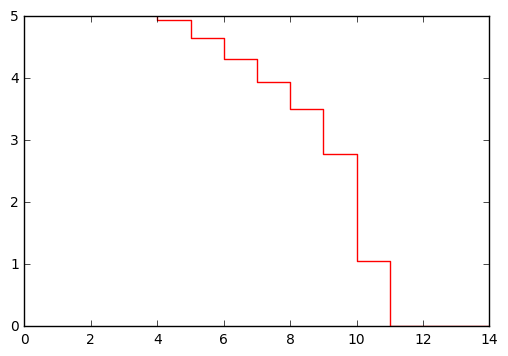

In [15]:
interact(mk_line, **arguments)